# DSN COHORT 2 PROJECT

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Load data

In [2]:
train_path = "train.csv"
trainDf = pd.read_csv(train_path)

In [3]:
trainDf.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


In [4]:
test_path = "test.csv"
testDf = pd.read_csv(test_path)

In [5]:
testDf.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0


In [6]:
trainDf.describe(include = 'all')

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177,297177,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
unique,297177,293751,NaN,NaN,NaN,NaN,NaN
top,ID_QF0ZTQJ2SF5Q,2021-11-26 17:23:00,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.751195,38.183018,23.316554,78.653623,0.371072
std,NaN,NaN,28.526182,28.647761,3.836971,14.772725,0.483092
min,NaN,NaN,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,NaN,NaN,22.430000,19.520000,20.400000,68.000000,0.000000
50%,NaN,NaN,36.470000,33.720000,21.900000,84.000000,0.000000
75%,NaN,NaN,49.420000,47.570000,26.300000,91.000000,1.000000


In [7]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 297177 non-null  object 
 1   Datetime           297177 non-null  object 
 2   Sensor1_PM2.5      293563 non-null  float64
 3   Sensor2_PM2.5      293563 non-null  float64
 4   Temperature        293628 non-null  float64
 5   Relative_Humidity  293628 non-null  float64
 6   Offset_fault       297177 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


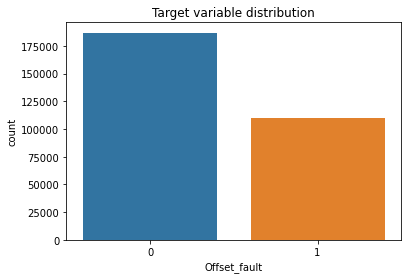

In [8]:
sns.countplot(trainDf["Offset_fault"])
plt.title('Target variable distribution')
plt.show()

In [9]:
testDf.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
count,127361.000000,127361.000000,39271.000000,39271.000000
mean,42.795356,43.958427,23.683838,72.215834
std,27.838730,28.260335,3.725563,18.078569
min,1.230000,0.780000,16.900000,28.000000
25%,24.670000,25.580000,20.900000,58.000000
50%,39.770000,39.880000,22.500000,78.000000
75%,52.030000,52.830000,26.500000,88.000000
max,927.780000,894.750000,34.000000,97.000000


In [10]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 127361 non-null  object 
 1   Datetime           127361 non-null  object 
 2   Sensor1_PM2.5      127361 non-null  float64
 3   Sensor2_PM2.5      127361 non-null  float64
 4   Temperature        39271 non-null   float64
 5   Relative_Humidity  39271 non-null   float64
dtypes: float64(4), object(2)
memory usage: 5.8+ MB


#### Concatenate test and train dataframes

In [11]:
df = pd.concat([trainDf, testDf])
df = df.reset_index().drop('index', axis = 1)
df

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0.0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0.0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0.0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0.0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0.0
...,...,...,...,...,...,...,...
424533,ID_HNCS9Q2GNCQB,2022-02-13 00:37:14,33.65,42.23,NaN,NaN,NaN
424534,ID_GIIQYTE11L3H,2022-03-09 16:26:42,21.23,15.72,NaN,NaN,NaN
424535,ID_EC7F1P4GXKCL,2022-02-18 14:47:28,41.45,47.25,NaN,NaN,NaN
424536,ID_J64RVG2BRAG0,2022-03-11 19:14:11,28.60,27.27,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424538 entries, 0 to 424537
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 424538 non-null  object 
 1   Datetime           424538 non-null  object 
 2   Sensor1_PM2.5      420924 non-null  float64
 3   Sensor2_PM2.5      420924 non-null  float64
 4   Temperature        332899 non-null  float64
 5   Relative_Humidity  332899 non-null  float64
 6   Offset_fault       297177 non-null  float64
dtypes: float64(5), object(2)
memory usage: 22.7+ MB


In [13]:
df.dtypes

ID                    object
Datetime              object
Sensor1_PM2.5        float64
Sensor2_PM2.5        float64
Temperature          float64
Relative_Humidity    float64
Offset_fault         float64
dtype: object

In [14]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

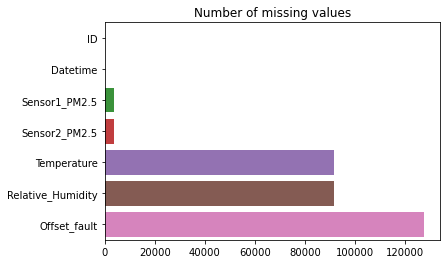

In [15]:
sns.barplot(x = df.isnull().sum(), y = df.columns)
plt.title('Number of missing values')
plt.show()

#### Missing Values

In [16]:
percentMissing = df.isnull().sum() * 100/len(df)
percentMissing

ID                    0.000000
Datetime              0.000000
Sensor1_PM2.5         0.851278
Sensor2_PM2.5         0.851278
Temperature          21.585582
Relative_Humidity    21.585582
Offset_fault         29.999906
dtype: float64

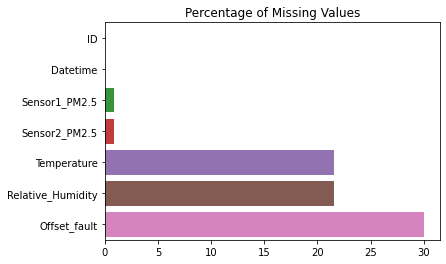

In [17]:
sns.barplot(x = percentMissing, y = df.columns)
plt.title("Percentage of Missing Values")
plt.show()

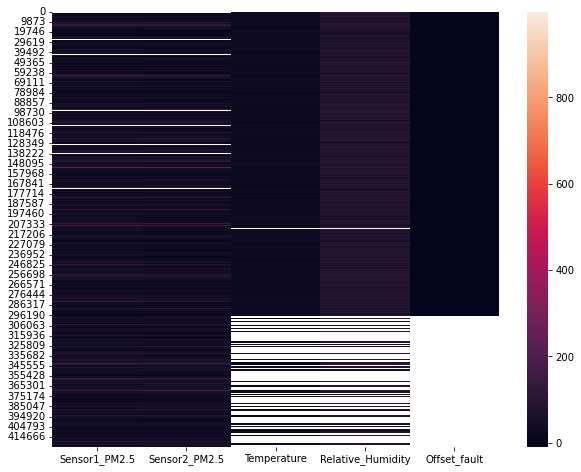

In [18]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df[df.columns.drop(['ID', 'Datetime'])])
plt.show()

In [19]:
df.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0.0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0.0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0.0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0.0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0.0


### Feature Engineering

In [20]:
df['Year'] = df.Datetime.dt.year
df['Month'] = df.Datetime.dt.month
df['Day'] = df.Datetime.dt.day
df['Hour'] = df.Datetime.dt.hour
df.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,Year,Month,Day,Hour
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0.0,2021,11,3,4
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0.0,2021,11,8,18
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0.0,2021,11,7,9
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0.0,2022,1,1,18
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0.0,2021,11,5,22


In [21]:
df[['Year', 'Month', 'Day']].groupby(['Year', 'Month']).sum()

Day
Year Month         
2021 10     1162202
     11     1423980
     12     1505817
2022 1      1309709
     2       970380
     3       275919

In [22]:
df[['Temperature', 'Month']].groupby('Month').mean()

,Temperature
Month,
1,23.443993
2,22.768774
3,NaN
10,23.309733
11,23.133447
12,23.635840


In [23]:
df.mode().iloc[0]

ID                       ID_0001Z29CH9SP
Datetime             2021-10-26 02:03:01
Sensor1_PM2.5                      40.77
Sensor2_PM2.5                      35.07
Temperature                         20.3
Relative_Humidity                   91.0
Offset_fault                         0.0
Year                              2021.0
Month                               12.0
Day                                  3.0
Hour                                 2.0
Name: 0, dtype: object

In [24]:
df[df['Month'] == 1]['Relative_Humidity'].isnull().sum()

1990

In [25]:
df[df['Month'] == 1]['Relative_Humidity'].value_counts()

93.0    3329
79.0    3017
91.0    2881
90.0    2775
85.0    2646
        ... 
38.0     233
29.0     229
42.0     133
32.0     128
28.0     118
Name: Relative_Humidity, Length: 71, dtype: int64

In [26]:
df[df['Month'] == 1]['Relative_Humidity'].mean()

73.48074203676629

Fill the missing values with the mean 

In [27]:
null_cols = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity']
df[null_cols] = df[null_cols].fillna(df[null_cols].mean())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424538 entries, 0 to 424537
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 424538 non-null  object        
 1   Datetime           424538 non-null  datetime64[ns]
 2   Sensor1_PM2.5      424538 non-null  float64       
 3   Sensor2_PM2.5      424538 non-null  float64       
 4   Temperature        424538 non-null  float64       
 5   Relative_Humidity  424538 non-null  float64       
 6   Offset_fault       297177 non-null  float64       
 7   Year               424538 non-null  int64         
 8   Month              424538 non-null  int64         
 9   Day                424538 non-null  int64         
 10  Hour               424538 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 35.6+ MB


In [29]:
df[['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity']].mean()

Sensor1_PM2.5        41.369707
Sensor2_PM2.5        39.930512
Temperature          23.359881
Relative_Humidity    77.894178
dtype: float64

In [30]:
df["Sensor1_PM2.5"].values

array([52.58, 35.25, 19.18, ..., 41.45, 28.6 , 41.87])

#### Outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

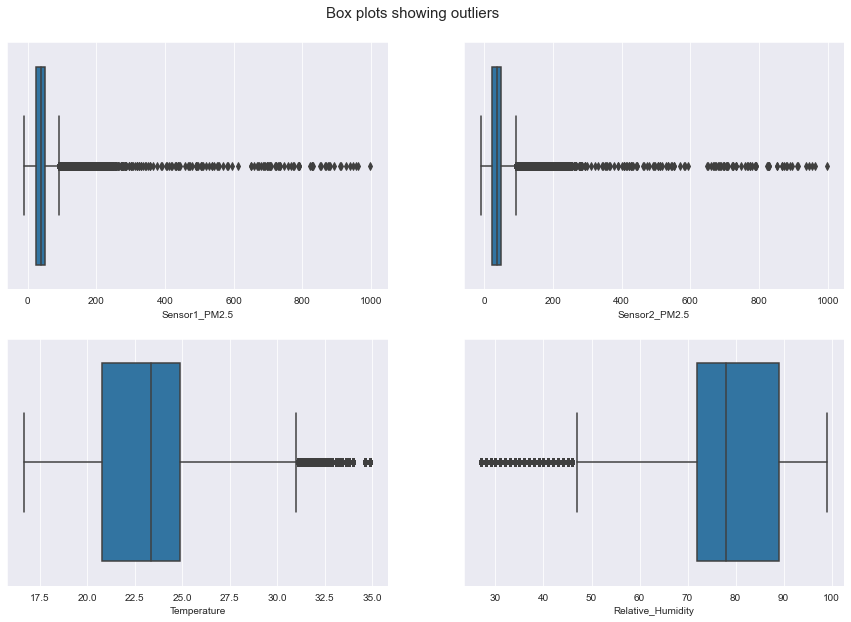

In [31]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity']):
  sns.boxplot(df[name], ax = ax)

In [32]:
# Feature transformation
'''trans_cols = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity']
for i in trans_cols:
    df[i] = np.log10(df[i])
df.head()'''

"trans_cols = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity']\nfor i in trans_cols:\n    df[i] = np.log10(df[i])\ndf.head()"

In [33]:
df['Sensor1_PM2.5'].value_counts()

41.369707     3614
40.770000      189
43.520000      179
39.950000      177
42.080000      177
              ... 
178.650000       1
731.950000       1
145.400000       1
161.130000       1
189.980000       1
Name: Sensor1_PM2.5, Length: 10457, dtype: int64

#### Split dataset into Training and Validation

In [34]:
train = df[df['Offset_fault'].notnull()].dropna()
test = df[df['Offset_fault'].isnull()].drop('Offset_fault', axis = 1).dropna()

In [35]:
train.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [36]:
var = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Year', 'Month', 'Day', 'Hour']

In [37]:
'''features = ['Sensor1_PM2.5',
 'Sensor2_PM2.5',
 'Temperature',
 'Relative_Humidity']'''

"features = ['Sensor1_PM2.5',\n 'Sensor2_PM2.5',\n 'Temperature',\n 'Relative_Humidity']"

In [38]:
X_train, X_val, y_train, y_val = train_test_split(train[var].to_numpy(), train['Offset_fault'], test_size = 0.25)

### Modelling

#### Logistic Regression

In [39]:
lgr = LogisticRegression()
lgr_model = lgr.fit(X_train, y_train)
y_lgr = lgr_model.predict(X_val)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
lgr_model.score(X_val, y_val)

0.8970859411804294

#### Random Forest Classifier

In [41]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_rfc = rfc_model.predict(X_val)

In [42]:
rfc_model.score(X_val, y_val)

0.9712362877717209

#### Decision Tree Classifier

In [43]:
dct = DecisionTreeClassifier()
dct_model = dct.fit(X_train, y_train)
y_dct = dct_model.predict(X_val)

In [44]:
dct_model.score(X_val, y_val)

0.9292549969715324

#### XGBoost Classifer

In [45]:
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train)
y_xgb = xgb_model.predict(X_val)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
xgb_model.score(X_val, y_val)

0.9559189716670031

#### Extra Trees Classifier

In [47]:
etc = ExtraTreesClassifier(random_state = 1)
etc_model = etc.fit(X_train, y_train)
y_etc = etc_model.predict(X_val)

In [48]:
etc_model.score(X_val, y_val)

0.9695807254862373

In [49]:
def model(mod):
    mod.fit(X_train, y_train)
    mod.predict(X_val)
    return mod.score(X_val, y_val)

In [50]:
model(etc)

0.9695807254862373

#### Feature Selection

In [51]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(train[var], train['Offset_fault'])
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

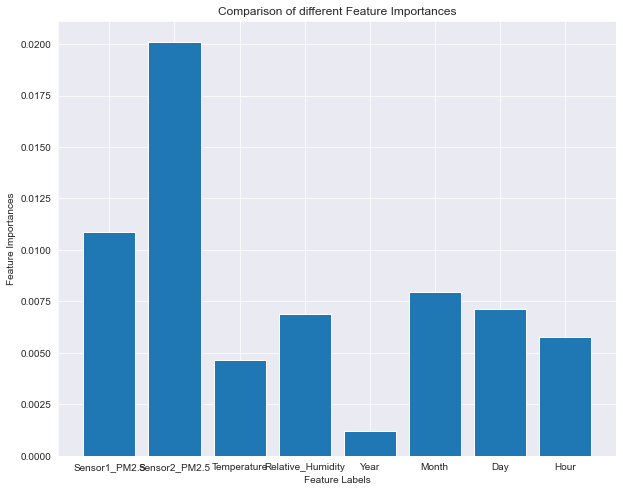

In [52]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize = (10, 8))
plt.bar(train[var].columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [53]:
final_features = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Month', 'Day']

In [54]:
#X_train, X_test, y_train, y_val = train_test_split(train[var].to_numpy(), train['Offset_fault'], test_size = 0.25)

NameError: name 'features' is not defined

In [55]:
Xtrain = train[final_features].to_numpy()
ytrain = train['Offset_fault']
X_test = test[final_features].to_numpy()
y_test = []

#### Extra Trees Classifier Model

In [56]:
extra_tree_forest.fit(Xtrain, ytrain)
y_pred = extra_tree_forest.predict(X_test)

In [57]:
len(y_pred)

127361

In [58]:
testDf

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0
...,...,...,...,...,...,...
127356,ID_HNCS9Q2GNCQB,2022-02-13 00:37:14,33.65,42.23,NaN,NaN
127357,ID_GIIQYTE11L3H,2022-03-09 16:26:42,21.23,15.72,NaN,NaN
127358,ID_EC7F1P4GXKCL,2022-02-18 14:47:28,41.45,47.25,NaN,NaN
127359,ID_J64RVG2BRAG0,2022-03-11 19:14:11,28.60,27.27,NaN,NaN


In [59]:
submissionDf = pd.DataFrame(y_pred, columns = ['Offset_fault'])
submissionDf.index = testDf['ID']
submissionDf = submissionDf.reset_index()
submissionDf.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0.0
1,ID_U2EKAY4SGA94,0.0
2,ID_UJFLEWQR0U4N,0.0
3,ID_S2C2GPGA4R5I,0.0
4,ID_5V2C2ZL221H8,1.0


In [60]:
submissionDf.to_csv('Ibraheem_Kekere-Ekun.csv', index = False)